Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

* Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler

In [3]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split

* Read that data into Python and call the dataframe churnData.

In [4]:
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


* Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [5]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
churnData['TotalCharges'] = churnData['TotalCharges'].replace([' '],'0')

In [7]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'])
churnData['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

* Check for null values in the dataframe. Replace the null values.

In [8]:
nulls = pd.DataFrame(churnData.isna().sum()*100/len(churnData), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
OnlineSecurity,0.0
OnlineBackup,0.0
DeviceProtection,0.0
TechSupport,0.0


No null values to replace

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges: 

In [9]:
y = churnData['Churn']
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

* Scale the features either by using normalizer or a standard scaler.

In [10]:
scaler = StandardScaler()

* Split the data into a training set and a test set.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler.fit(X_train)

StandardScaler()

* Fit a logistic regression model on the training data.

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8119233498935415

* Check the accuracy on the test data.

In [15]:
predictions = model.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.83      0.94      0.88      1036
         Yes       0.72      0.47      0.57       373

    accuracy                           0.81      1409
   macro avg       0.78      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



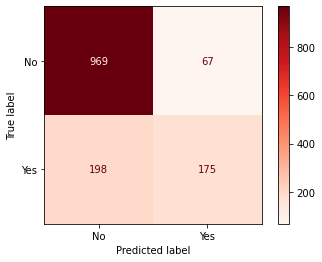

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap='Reds')
plt.show()

The model is pretty good for predicting 'no', but quite bad for predicting 'yes'

#### Managing imbalance in the dataset

* Check for the imbalance.

In [17]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

In [18]:
# Upsampling
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

In [20]:
#Now the data is equilibrated

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7429951690821256

In [23]:
predictions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.74      0.73      0.74      1021
         Yes       0.74      0.75      0.75      1049

    accuracy                           0.74      2070
   macro avg       0.74      0.74      0.74      2070
weighted avg       0.74      0.74      0.74      2070



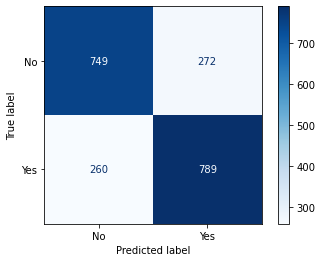

In [24]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')
plt.show()

Despite a slightly lower score, upsampling greatly improves the accuracy of the 'yes' prediction

In [25]:
# Downsampling
from imblearn.under_sampling import TomekLinks

In [26]:
tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

No     4620
Yes    1869
Name: Churn, dtype: int64

In [27]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7912172573189522

In [30]:
predictions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86       929
         Yes       0.67      0.53      0.59       369

    accuracy                           0.79      1298
   macro avg       0.75      0.71      0.72      1298
weighted avg       0.78      0.79      0.78      1298



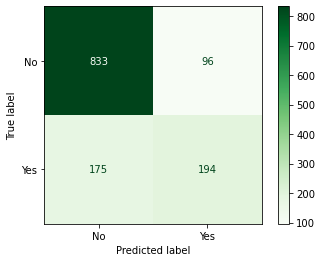

In [31]:
plot_confusion_matrix(model, X_test, y_test, cmap='Greens')
plt.show()

In contrast to upsampling, downsampling with TomekLinks gives worse predictions for answer 'yes'